In [2]:
import numpy as np
import pandas as pd

In [8]:
i = 5
j = 6
starting_i = i
starting_j = j

print(f"starting_i {starting_i}  \nstarting_j {starting_j}")
print(f"i {i}  \nj {j}")

i += 10
j += 6
print("=========================")
print(f"i {i}  \nj {j}")

print(f"starting_i {starting_i}  \nstarting_j {starting_j}")



starting_i 5  
starting_j 6
i 5  
j 6
i 15  
j 12
starting_i 5  
starting_j 6


In [13]:
data = []
data.append([10])
print(data[0][0])

10


In [14]:
for i in range(0, 5):
    print(i)

0
1
2
3
4


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import *
from tkinter import ttk
import csv
import numpy as np

csv_file_path = "Bellevue Nissan Reports.csv"
marked_cells = {}
data = []
data2 = []
list_of_dfs = []

def get_row_count(csv_file_path):
    with open(csv_file_path, 'r') as file:
        count = 0
        for i in file:
            count += 1
    
    return count

with open(csv_file_path) as file:
    row_count = get_row_count(csv_file_path)
    for row in file:
        data.append(row)
    data2.append(data[0].split(","))
    for i in range(1, len(data) - 1, 1):
       
                    
        for a in data[i]: 
            line_with_value = False
            if a != ",":
                if a != "\n":
                    line_with_value = True
            if (data[i - 1] != data[i + 1]) or line_with_value:
                data2.append(data[i].split(","))
                break
    file.close()
        
def mark_df_as_seen(marked_cells, starting_i, starting_j, height, width):
    for row in range(starting_i, starting_i + height):
        for column in range(starting_j, starting_j + width):
            marked_cells[(row, column)] = True
    return None

def create_df_no_title(darray, i, j):
    title = darray[i][j]
    starting_i = i
    starting_j = j
    height = 0
    width = 0
    while darray[starting_i][j] != "":
        width += 1
        j += 1
    while darray[i][starting_j] != "":
        height += 1
        i += 1
    matrix = []
    
    for g in range(starting_i, starting_i + height):
        temp_list = []
        for f in range(starting_j, starting_j + width):
            if "%" in darray[g][f]:
                temp_list.append(float(darray[g][f][:-1]))
                
            else:
                temp_list.append(darray[g][f])
        matrix.append(temp_list)
    df = pd.DataFrame(matrix)
    df.columns = df.iloc[0]
    df = df[1:]
    mark_df_as_seen(marked_cells, starting_i, starting_j, height, width)
    return {title: df}

def create_df_yes_title(darray, i, j):
    title = darray[i][j]
    marked_cells[(i,j)] = True
    i += 1
    if darray[i][j] == "":
        return None
    starting_i = i
    starting_j = j
    height = 0
    width = 0
    while darray[starting_i][j] != "":
        width += 1
        j += 1
    while darray[i][starting_j] != "":
        height += 1
        i += 1
    matrix = []
    
    for g in range(starting_i, starting_i + height):
        temp_list = []
        for f in range(starting_j, starting_j + width):
            if "%" in darray[g][f]:
                temp_list.append(float(darray[g][f][:-1]))
                
            else:
                temp_list.append(darray[g][f])
        matrix.append(temp_list)
    df = pd.DataFrame(matrix)
    df.columns = df.iloc[0]
    df = df[1:]
    mark_df_as_seen(marked_cells, starting_i - 1, starting_j, height + 1, width)
    return {title: df}

def parse_csv_file(list_of_dfs, csv_file_path):
    return_value = list_of_dfs
    for row in range(len(data2)):
        for column in range(len(data2[row]) - 1):
            
            if (row, column) in marked_cells:
                continue
            else:
                
                #marked_cells[(row,column)] = True
                if (data2[row][column] == "") or (data2[row][column] == "\n"):
                    
                    continue
                else:
                    
                    if (data2[row][column + 1] != ""):
                        return_value.append(create_df_no_title(data2, row, column))
                    else:
                        
                        return_value.append(create_df_yes_title(data2, row, column))
    return return_value

                
a = parse_csv_file(list_of_dfs, "Bellevue Nissan Reports.csv")

#print(a[2]["Sales Consultant KPI"])
#print(type(a[2]["Sales Consultant KPI"]))


In [42]:
pdf = a[2]["Sales Consultant KPI"]
print(pdf)


0             NAME MTD Count MTD Score QTD Count QTD Score
1    Courtney Ruiz         1       980         8       995
2      Doug Truong         3      1000        15       987
3   Ernesto Rivera         3       957        12       983
4  Jeremy Williams         3       900        12       959
5  Nicholas Taylor         0         0        10      1000
6      Sean Light          0         0         0         0


In [24]:
adf = pdf.set_index("NAME")
columns = pdf.columns


<Axes: title={'center': 'MTD Count by Name'}, xlabel='NAME'>

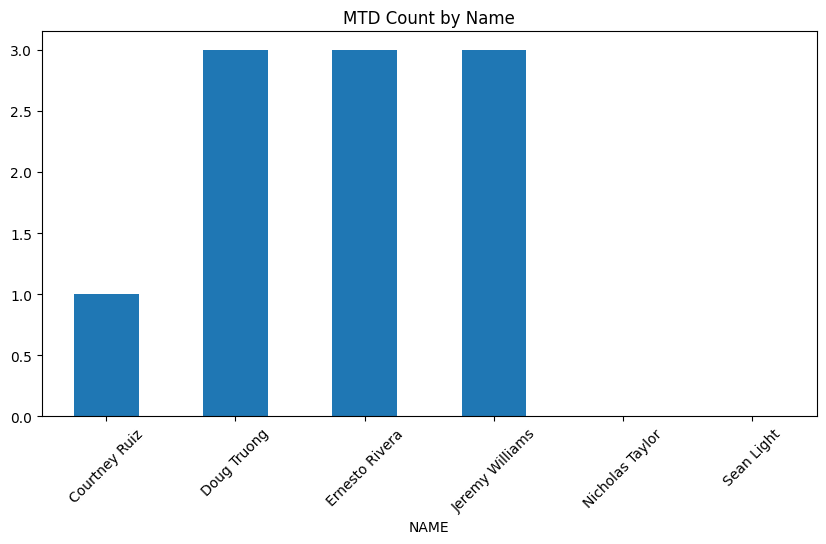

In [59]:
gf = pd.DataFrame({"NAME": ["Courtney Ruiz", "Doug Truong", "Ernesto Rivera", 
             "Jeremy Williams", "Nicholas Taylor", "Sean Light"],
    "MTD Count": [1, 3, 3, 3, 0, 0],
    "MTD Score": [980, 1000, 957, 900, 0, 0],
    "QTD Count": [8, 15, 12, 12, 10, 0],
    "QTD Score": [995, 987, 983, 959, 1000, 0]})
gf
gf.plot(
    kind='bar',
    x='NAME',            # X-axis labels
    y='MTD Count',       # Y-axis values
    title='MTD Count by Name',
    legend=False,        # Remove legend
    rot=45,             # Rotate x-labels
    figsize=(10, 5)     # Plot size
)


In [57]:
pdf

,NAME,MTD Count,MTD Score,QTD Count,QTD Score
1,Courtney Ruiz,1,980,8,995
2,Doug Truong,3,1000,15,987
3,Ernesto Rivera,3,957,12,983
4,Jeremy Williams,3,900,12,959
5,Nicholas Taylor,0,0,10,1000
6,Sean Light,0,0,0,0


In [ ]:
adf 

,MTD Count,MTD Score,QTD Count,QTD Score
NAME,,,,
Courtney Ruiz,1,980,8,995
Doug Truong,3,1000,15,987
Ernesto Rivera,3,957,12,983
Jeremy Williams,3,900,12,959
Nicholas Taylor,0,0,10,1000
Sean Light,0,0,0,0


In [38]:
adf.columns = adf.iloc[0]
df = adf.iloc[1:].reset_index(drop=True)

# Optional: cast numeric columns
#for col in columns:
#    df[col] = pd.to_numeric(df[col])

print(df)

Courtney Ruiz  1   980   8   995
0              3  1000  15   987
1              3   957  12   983
2              3   900  12   959
3              0     0  10  1000
4              0     0   0     0


In [68]:
import tkinter as tk
from tkinterdnd2 import TkinterDnD, DND_FILES
root = TkinterDnD.Tk()
root.title("Drag and Drop File")
root.geometry("400x300")

label = tk.Label(root, text="Drop files here", bg="lightgray", width=40, height=10)
label.pack(pady=20)
label.drop_target_register(DND_FILES)
label.dnd_bind('<<Drop>>', lambda event: print_file_paths(event))
def print_file_paths(event):
    file_paths = event.data.split()
    for file_path in file_paths:
        print(f"File Path: {file_path}")
        label.config(text=f"File Path: {file_path}")
root.mainloop()

File Path: {C:/Users/chipp/Downloads/testing
File Path: testing.txt}


In [66]:
from tkinter import *

def drag_start(event):
    widget = event.widget
    widget.startX = event.x
    widget.startY = event.y

def drag_motion(event):
    widget = event.widget
    x = widget.winfo_x() - widget.startX + event.x
    y = widget.winfo_y() - widget.startY + event.y
    widget.place(x=x,y=y)

window = Tk()

label = Label(window,bg="red",width=10,height=5)
label.place(x=0,y=0)

label2 = Label(window,bg="blue",width=10,height=5)
label2.place(x=100,y=100)

label.bind("<Button-1>",drag_start)
label.bind("<B1-Motion>",drag_motion)

label2.bind("<Button-1>",drag_start)
label2.bind("<B1-Motion>",drag_motion)

window.mainloop()



In [ ]:
xls = pd.ExcelFile('BellevueNissanReports sandbox.xlsx')
sheet_names = xls.sheet_names
excel_file = pd.read_excel("BellevueNissanReports sandbox.xlsx", sheet_name=sheet_names[0])


In [4]:
excel_file.to_csv("your_csv_file.csv", index=False)


In [7]:
print(sheet_names)

['Bellevue KPI', 'Bellevue Reputation', 'Bellevue Survey Count']


In [1]:
for i in range(6):
    print(i)

0
1
2
3
4
5
